In [1]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

# Data Preparation

In [2]:
# Creating passing grade function
def pass70(x):
    return x[x>=70].count()/len(x)*100

# Cleaning data 
school_data_complete['grade'] = school_data_complete['grade'].map(lambda x: int(x.replace('th','')))

# Creating boolean column for passing both tests
school_data_complete["both_pass"] = (school_data_complete['math_score']>=70)&(school_data_complete['reading_score']>=70)

# Set new index to school_name and assign data to the new DataFrame: df
df = school_data_complete.set_index("school_name",drop=True)

# Creating passing both tests data frame and assigning values to pass_selection
pass_df = df.loc[df['both_pass']==True]
pass_selection = pass_df.groupby(["both_pass", pass_df.index])["both_pass"].count().values

In [3]:
global schools_list, grades_list
schools_list = school_data_complete.school_name.unique()
schools_number =len(schools_list)
grades_list = sorted(school_data_complete.grade.unique())
unique_stud = len(school_data_complete.student_name.unique())
total_stud = len(school_data_complete)
tot_budget = school_data_complete.budget.unique().sum()

In [4]:
# Creating a New Summary Data Frame
pass_grades_df = school_data_complete.groupby(df.index)[['math_score', 'reading_score']].agg(pass70).add_suffix("_%pass")
mean_grades_df = school_data_complete.groupby(df.index)[['math_score', 'reading_score']].mean().add_suffix("_avg")
tot_stud_df = school_data_complete.groupby(df.index)['size'].count()
tot_budget_df = school_data_complete.groupby(df.index)['budget'].sum()/tot_stud_df
school_type = school_data_complete.groupby(df.index)['type'].unique()
overall_pass = pass_selection/tot_stud_df*100
col_list = ["School Type", "Total Students", "Total School Budget", "Per Student Budget", "% Overall Passing"]
df_data = list(zip(school_type, tot_stud_df, tot_budget_df, tot_budget_df/tot_stud_df, overall_pass))
total_df = pd.DataFrame(df_data, columns = col_list)
grades_df = mean_grades_df.merge(pass_grades_df, left_index=True, right_index=True)
sum_df = pd.merge(total_df, grades_df, on=grades_df.index).set_index(grades_df.index)
del sum_df['key_0']

# District Summary

* Calculate the total budget
* Calculate the total number of schools
* Calculate the total number of students

* Calculate the average math score
* Calculate the average reading score
* Calculate the percentage of students with a passing math score (70 or greater)
* Calculate the percentage of students with a passing reading score (70 or greater)
* Calculate the percentage of students who passed math **and** reading (% Overall Passing)
* Create a dataframe to hold the above results
* Optional: give the displayed data cleaner formatting

In [5]:
def df_summary (df_sum, tot_case = False):
    """Summary Analysis of a DataFrame
    Args:
        df_sum (DataFrame): Given DataFrame
        tot_case (bool):    False for summary per single school
                            True for summary per set of  school
    Returns:
        sum_data (list): Analysis output values)
    """
    global tot_num, tot_budget, schools_number
    tot_num = len(df_sum)
    tot_budget = df_sum.budget.unique().sum()
    
    if tot_case == True:
        schools_number =len(schools_list)
        sc_type = "Charter/District"
    else: 
        sc_type = df_sum.type.all()
        schools_number = 1
        
    avg_math = df_sum.math_score.sum()/tot_num
    avg_read = df_sum.reading_score.sum()/tot_num
    st_pass_math = len(df_sum.math_score[df_sum.math_score>=70])
    st_pass_read = len(df_sum.reading_score[df_sum.reading_score>=70])
    st_pass_both = len(df_sum[(df_sum.math_score>=70)
                                                    & (df_sum.reading_score>=70)])
    st_pass_one = len(df_sum.loc[(df_sum.math_score>=70)
                                                    | (df_sum.reading_score>=70)])

    sum_data = [schools_number, sc_type, "{0:,}".format(tot_num), "${:,.2f}".format(tot_budget), 
                tot_budget/tot_num, avg_math, avg_read, st_pass_math/tot_num*100, 
                st_pass_read/tot_num*100, st_pass_both/tot_num*100, st_pass_one/tot_num*100]
    return sum_data

In [6]:
col_names = {"School Name": ["Number of Schools", "School Type", "Total Students", "Total School Budget",
            "Per Student Budget", "Average Math Score", "Average Read Score", "% Pass Math",
            "% Pass Reading", "% Overall Passing (Math&Read)", "% At Least One Test Pass"]}
distr_sum_df = pd.DataFrame.from_dict(col_names)
distr_sum_df["_City's School District"] = df_summary(school_data_complete, True)

In [7]:
border = "#"*135
print("\nDistrict Summary, Schools by Number of Students:\n{}\n".format(border))
pd.set_option('display.max_colwidth', 30)
pd.options.display.float_format = '{:,.2f}'.format

print("\n{}\nTotal budget: ${:,}\nTotal number of schools:{}".format(border, tot_budget, schools_number))
print("Total number of students: by school records - {:,}, by unique name - {:,}\n{}".format(tot_num, tot_stud, border))
distr_sum_df.transpose()


District Summary, Schools by Number of Students:
#######################################################################################################################################


#######################################################################################################################################
Total budget: $24,649,428
Total number of schools:15


NameError: name 'tot_stud' is not defined

## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * % Overall Passing (The percentage of students that passed math **and** reading.)
  
* Create a dataframe to hold the above results

In [ ]:
# Set new index to school_name and assign data to the new DataFrame: school_df
school_df = school_data_complete.set_index("school_name",drop=True)

In [ ]:
#
for i in range(len(schools_list)):
 distr_sum_df.insert(i+1,schools_list[i], df_summary(school_df.loc[school_df.index == schools_list[i], :]))
transpose_df = distr_sum_df.transpose()
transpose_df.columns = transpose_df.iloc[0]
final_sum_df = transpose_df[1:]
final_sum_df.sort_index(ascending = True)

## Top Performing Schools (By % Overall Passing)

* Sort and display the top five performing schools by % overall passing.

In [ ]:
final_sum_df.sort_values('% Overall Passing (Math&Read)', ascending = False).head()

## Bottom Performing Schools (By % Overall Passing)

* Sort and display the five worst-performing schools by % overall passing.

In [ ]:
final_sum_df.sort_values('% Overall Passing (Math&Read)', ascending = True).head()

## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [ ]:
def grades_summary (df_grades, score):
    """Summary Analysis of a DataFrame over Grade Score
    Args:
        df_grades (DataFrame): Given DataFrame
        score (str):    Type of score for analysis
    Returns:
        df (DataFrame): Analysis output
    """
    df = pd.DataFrame()
    mean_list =[]
    for i in range(len(schools_list)):
        for j in range(len(grades_list)):
            group_df = df_grades.loc[school_df["grade"]==grades_list[j]]
            mean_list.append(group_df.loc[group_df.index == schools_list[i],:][score].mean())
        df.insert(i, schools_list[i], mean_list)
        mean_list=[]
    df.insert(i+1, "School Name", grades_list)
    df = df.set_index("School Name").transpose().add_suffix("th")
    return df

In [ ]:
grades_summary(school_df, 'math_score').sort_index()

## Reading Score by Grade 

* Perform the same operations as above for reading scores

In [ ]:
grades_summary(school_df, 'reading_score').sort_index()

## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [ ]:
final_df = final_sum_df.drop("_City's School District", axis=0).sort_index()
budget_df = final_df.loc[:,['Per Student Budget', 'Average Math Score', 'Average Read Score',
                                '% Pass Math', '% Pass Reading', '% Overall Passing (Math&Read)']]
bins = [0, 584, 629, 644, 675]
group_names = ["<584", "585-629", "630-644", "645-675"]
budget_df["Spending Ranges"] = pd.cut(budget_df["Per Student Budget"], bins, right = True, labels=group_names)
budget_df = budget_df.groupby("Spending Ranges").max()
del budget_df['Per Student Budget']
budget_df

## Scores by School Size

* Perform the same operations as above, based on school size.

In [ ]:
def pass70(x):
    return x[x>=70].count()/len(x)*100
scores_size = school_data_complete.groupby(['size'])[['math_score','reading_score']].agg(['mean', pass70])
scores_size['% Overal pass'] = final_df['% Overall Passing (Math&Read)'].values
scores_size = scores_size.reset_index()

In [ ]:
bins = [0, 1000, 2000, 5000]
group_names = ["<1000", "1000-2000", "2000-5000"]
scores_size["School Size"] = pd.cut(scores_size['size'], bins, right = True, labels=group_names, include_lowest=True)
scores_size = scores_size.groupby("School Size").max()
scores_size

## Scores by School Type

* Perform the same operations as above, based on school type

In [56]:
scores_type = school_data_complete.groupby('type')[['math_score','reading_score']].agg(['mean', pass70])
pass_type = df.groupby(['both_pass', 'type'])['both_pass'].count()
# pass_df = pass_df.loc[pass_df['type']=='Charter']
# pass_selection = pass_df.groupby(["both_pass", 'type', pass_df.index])["both_pass"].count().values.sum()
# scores_type['% Overal pass'] = final_df['% Overall Passing (Math&Read)'].values
pass_type

both_pass  type    
False      Charter      1151
           District    12491
True       Charter     11043
           District    14485
Name: both_pass, dtype: int64

# Trends in School Performance

* Scores Distribution (Math vs Reading)
* Overall Passing (Both Test vs At Least One)


Trend 1: Overall performance in reding is better over math



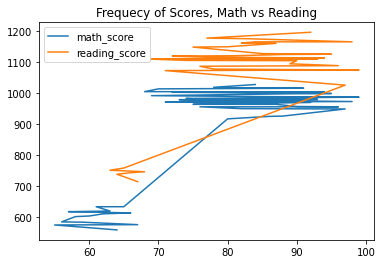

In [14]:
math = school_data_complete['math_score'].value_counts()
read = school_data_complete['reading_score'].value_counts()
math.plot(kind='line', title="Frequecy of Scores, Math vs Reading", legend = True)
read.plot(kind='line', legend = True)
print("\nTrend 1: Overall performance in reding is better over math\n")

In [ ]:
both_tests_pass = final_sum_df['% Overall Passing (Math&Read)'].sort_values()
one_test_pass = final_sum_df['% At Least One Test Pass'].sort_values()
one_test_pass.plot(kind = 'line', title="Passing Scores across Schools", stacked = True, colormap = 'flag', legend = True, rot=90)
both_tests_pass.plot(kind = 'bar', stacked = True, colormap = 'winter', legend = True, rot=90)
print("\nTrend 2:\nOverall performance in passing at least one test is\nbetter over passing both tests")

In [11]:
sum_df

,School Type,Total Students,Total School Budget,Per Student Budget,% Overall Passing,math_score_avg,reading_score_avg,math_score_%pass,reading_score_%pass
school_name,,,,,,,,,
Bailey High School,[District],4976,"3,124,928.00",628.00,54.64,77.05,81.03,66.68,81.93
Cabrera High School,[Charter],1858,"1,081,356.00",582.00,91.33,83.06,83.98,94.13,97.04
Figueroa High School,[District],2949,"1,884,411.00",639.00,53.20,76.71,81.16,65.99,80.74
Ford High School,[District],2739,"1,763,916.00",644.00,54.29,77.10,80.75,68.31,79.30
Griffin High School,[Charter],1468,"917,500.00",625.00,90.60,83.35,83.82,93.39,97.14
Hernandez High School,[District],4635,"3,022,020.00",652.00,53.53,77.29,80.93,66.75,80.86
Holden High School,[Charter],427,"248,087.00",581.00,89.23,83.80,83.81,92.51,96.25
Huang High School,[District],2917,"1,910,635.00",655.00,53.51,76.63,81.18,65.68,81.32
Johnson High School,[District],4761,"3,094,650.00",650.00,53.54,77.07,80.97,66.06,81.22


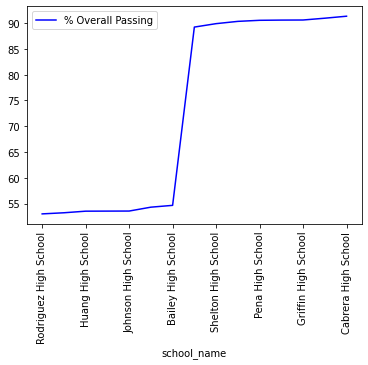

In [18]:
ov_pass = sum_df['% Overall Passing'].sort_values()
budget = sum_df['Per Student Budget'].sort_values()
ov_pass.plot(kind='line', colormap = 'winter', legend = True, rot=90)